In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv("tiktok_google_play_reviews.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Tejas\AppData\Local\Temp\ipykernel_16948\3870395608.py:12: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [31]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [32]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [33]:
print(data.isnull().sum())      # Check missing values

content    31
score       0
dtype: int64


In [34]:
data = data.dropna()     # Drop rows with missing values

In [35]:
# Load the list of English stopwords from NLTK
stopword = set(stopwords.words('english'))

def clean(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove content inside square brackets like [example]
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove URLs starting with http://, https://, or www.
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags like <div>, <br>, etc.
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation (e.g., !, ., ?, etc.)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove words containing digits (e.g., h4ppy, g00d)
    text = re.sub(r'\w*\d\w*', '', text)

    # Tokenize the text and remove stopwords, then stem the remaining words
    words = text.split()
    cleaned = [stemmer.stem(word) for word in words if word not in stopword]
    
    # Join the cleaned and stemmed words back into a single string
    return " ".join(cleaned)


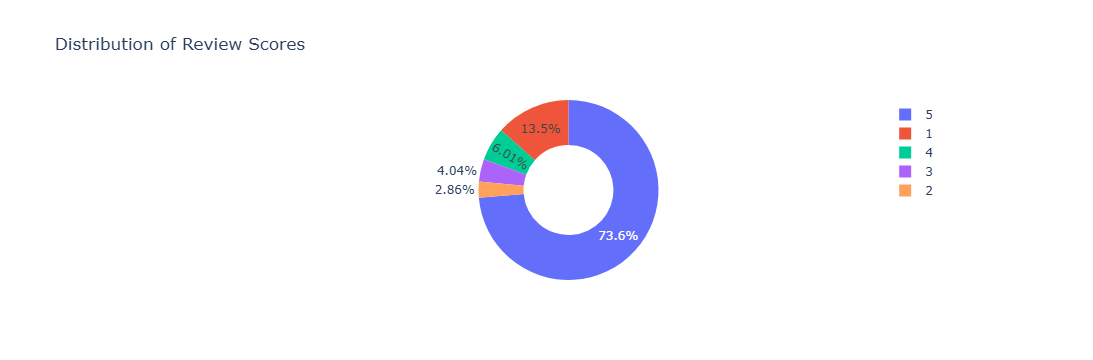

In [36]:

# Count the number of occurrences of each unique score value
ratings = data["score"].value_counts()

# Extract the unique score values (e.g., 1 to 5) as labels for the chart
numbers = ratings.index

# Extract the corresponding counts (i.e., how many times each score appears)
quantity = ratings.values

# Import Plotly Express for easy and interactive data visualization
import plotly.express as px

# Create a new DataFrame with labels and values for the pie chart
pie_data = pd.DataFrame({
    'score': ratings.index,
    'count': ratings.values
})

# Plot pie chart using the new compact DataFrame
figure = px.pie(pie_data,
                values='count',
                names='score',
                hole=0.5,
                title="Distribution of Review Scores")
figure.show()

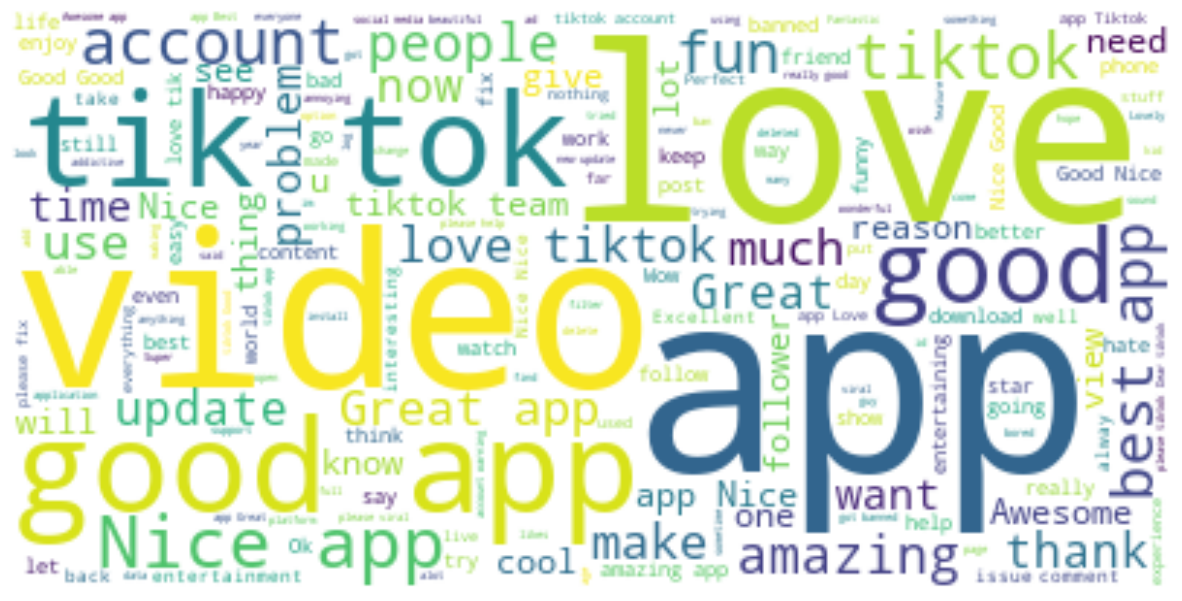

In [37]:
# Combine all the text content from the 'content' column into a single string
text = " ".join(i for i in data.content)

stopwords = set(STOPWORDS)

# Generate a word cloud image using the combined text, ignoring stopwords and setting background to white
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')     # Display the generated word cloud image with smooth edges

plt.axis("off")     # Hide the axes for a cleaner display

plt.show()

In [38]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

# Compute the positive, negative and neutral sentiment score for each content entry
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]

data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                           No words     0.000     0.688   
1                              Great fun app so far!     0.719     0.000   
2  The app would get a higher rating but I litera...     0.000     0.073   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...     0.561     0.000   
4                                Pictures and record     0.000     0.000   

   Neutral  
0    0.312  
1    0.281  
2    0.927  
3    0.439  
4    1.000  


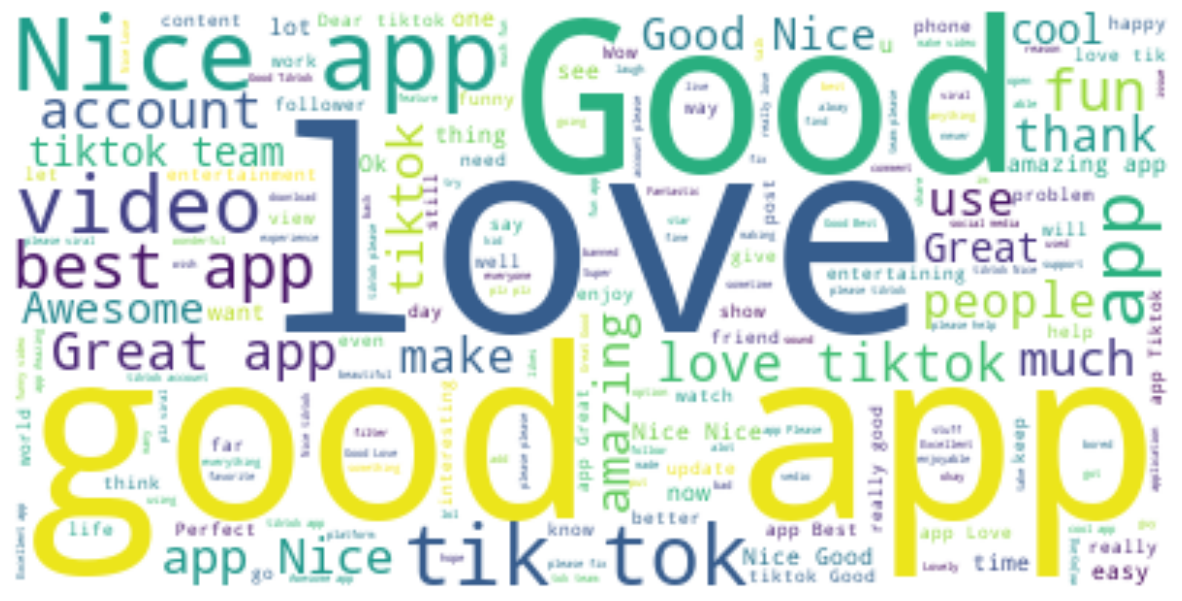

In [39]:
# Join all content where the Positive score is greater than the Negative score into one large text string
positive = ' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])

stopwords = set(STOPWORDS)

# Generate the word cloud from the filtered positive text
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

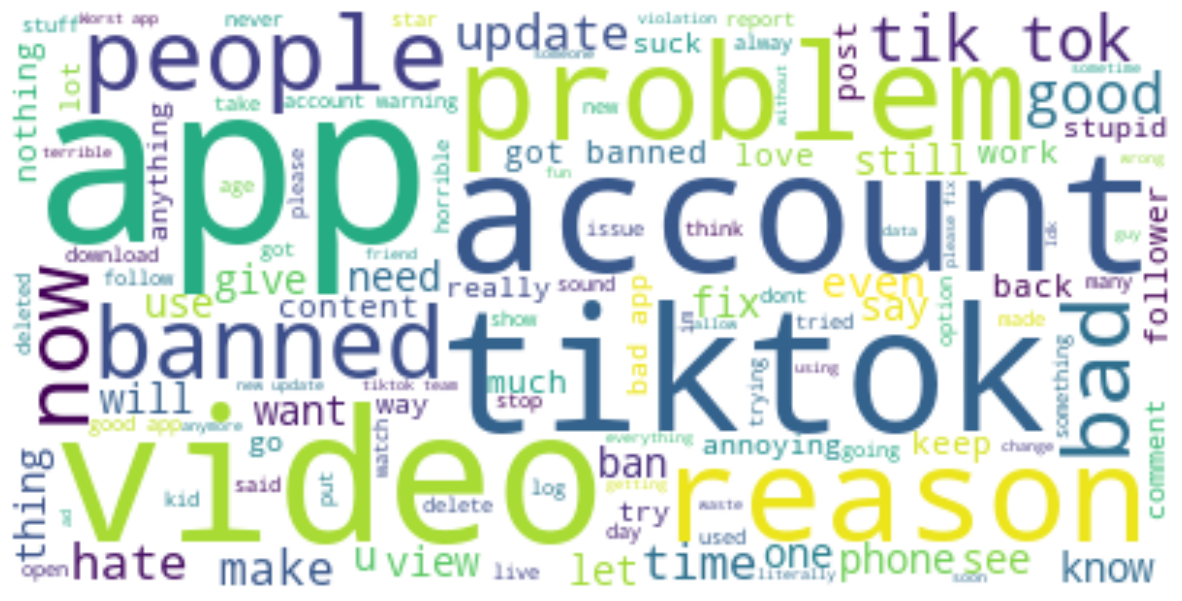

In [40]:
# Join all content where the Negative score is greater than the Positive score into one large text string
negative = ' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])

stopwords = set(STOPWORDS)

# Generate the word cloud from the filtered negative text
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Calculate the total sum of all Positive, Negative and Neutral sentiment scores
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

# Define a function to determine overall sentiment based on which score is dominant
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

# Call the function with total sentiment scores to determine overall sentiment
sentiment_score(x, y, z)

Neutral 🙂 


In [42]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  196353.47899996064
Negative:  16512.73600000027
Neutral:  244154.79300007297
